## Import packages

In [1]:
import os
import cv2
import glob
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

## Functions Implementation

In [2]:
#load Images

def Load_Images(Path_Directory):  #Load all images from the directory
    
    Img = []
    Images_in_Path = glob.glob('%s*.jpg' %Path_Directory)

    for idx, fname in enumerate(Images_in_Path):
    
        Img.append(cv2.imread(fname))

    return (Img)

def Save_Image(Save_Path_Directory,Image_Number,Picture): #Save your images to specific locations

    if not os.path.exists(Save_Path_Directory):
                os.makedirs(Save_Path_Directory)
    
    filename = "image%d.png" % Image_Number             
    mpimg.imsave(os.path.join(Save_Path_Directory,filename),Picture)
    
    return (True)

def Image_Processing(Img, Corners_Points):
    
    Objp = np.zeros((Corners_Points[0]*Corners_Points[1],3),np.float32)
    Objp[:,:2] = np.mgrid[0:Corners_Points[0], 0:Corners_Points[1]].T.reshape(-1,2)
    
    # termination criteria
    Criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

    # Printing out some stats and plotting
    print('This image is:', type(Img), 'with dimesions:', Img.shape) 
    
    # Convert to grayscale
    Gray = cv2.cvtColor(Img, cv2.COLOR_BGR2GRAY)
  
    # Find the chessboard corners
    Found, Corners =  cv2.findChessboardCorners(Gray,Corners_Points, None)
    
    # If found, Draw and display the corners
    if (Found == True):
        
        Corners2 = cv2.cornerSubPix(Gray,Corners,(11,11),(-1,-1),Criteria)
        
        cv2.drawChessboardCorners(Img, Corners_Points, Corners, Found)
        plt.imshow(Img)
        plt.show()
        Save_Image('output_images/',0,Img)
               
        #Return Object_Points and Image_Points needed for camera calibration
        return(True,Objp,Corners2)
    
    if (Found == False):
        print('Can\'t process image')
        return(False,0,0)

## Calibrate, Calculate Distortion Coefficients, then Test Undistortion on an Image!

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
Can't process image
This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)


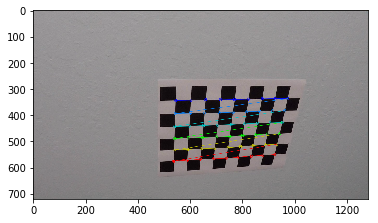

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)


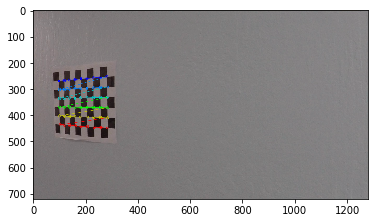

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)


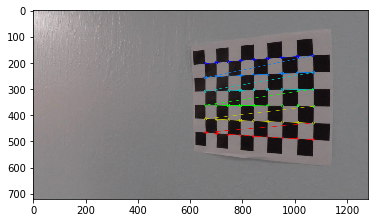

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)


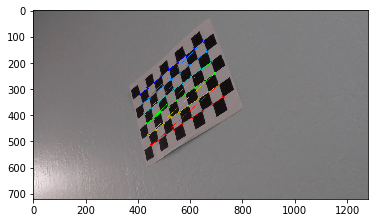

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)


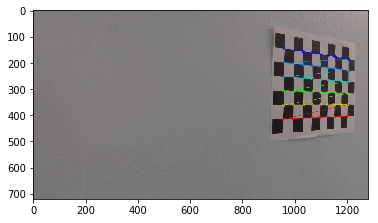

This image is: <class 'numpy.ndarray'> with dimesions: (721, 1281, 3)


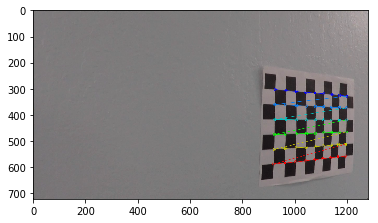

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)


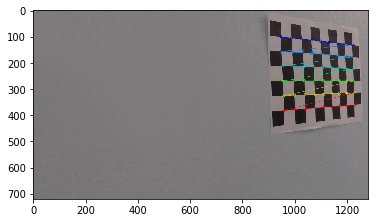

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)


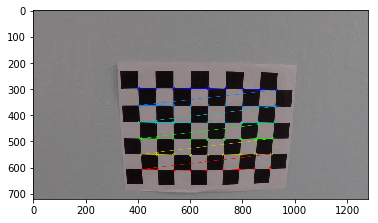

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)


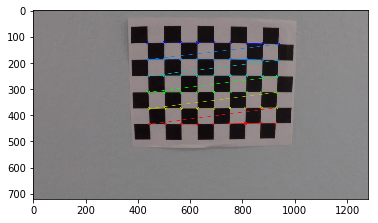

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)


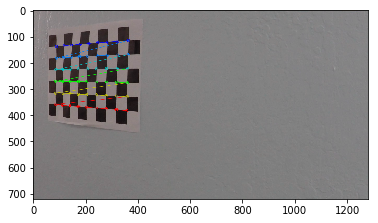

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)


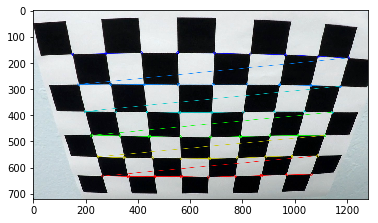

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)


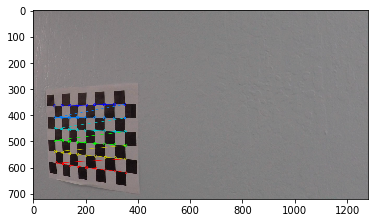

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)


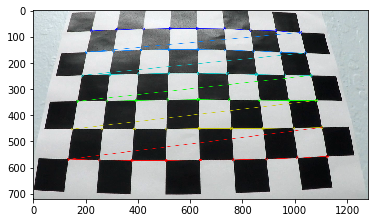

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
Can't process image
This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
Can't process image
This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)


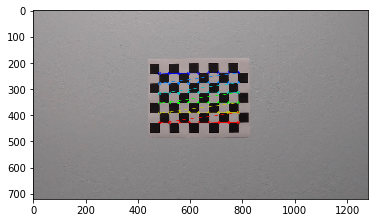

This image is: <class 'numpy.ndarray'> with dimesions: (721, 1281, 3)


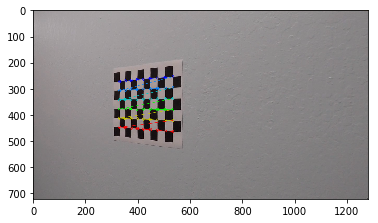

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)


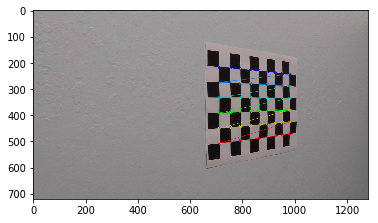

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)


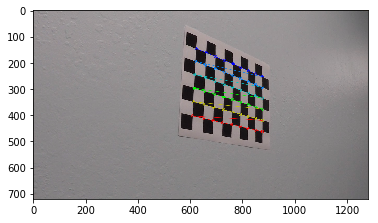

In [3]:
All_Images = Load_Images('camera_cal/calibration')
Data_Sets = len(All_Images)

# prepare object points
nx = 9  #Enter the number of inside corners in x <Count the number of corners in any given row and enter that value in nx>
ny = 6  #Enter the number of inside corners in y <count the number of corners in a given column and store that in ny>
Corners_Points = (nx,ny)

# Create Empty Arrays to store object points and image points from all the images.
Object_Points = [] # 3d points in real world space
Image_Points = []  # 2d points in image plane.

for Pics in range(0,Data_Sets):#
    status,objp,corners = Image_Processing(All_Images[Pics],Corners_Points)
    if(status == True):
        Object_Points.append(objp)
        #print(len(Object_Points))
        Image_Points.append(corners)
        #print(Image_Points)
    else:
        continue
    

## Example Image

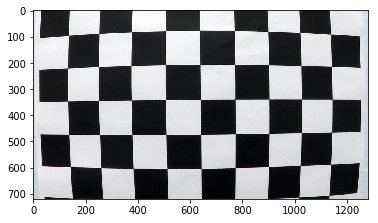

(1280, 720)


In [4]:
# Test undistortion on an image
exampleImg = cv2.imread('camera_cal/calibration1.jpg')
plt.imshow(exampleImg)
plt.show()
Image_Size = (exampleImg.shape[1], exampleImg.shape[0])
print(Image_Size)

In [5]:
# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(Object_Points, Image_Points, Image_Size,None,None)
dst = cv2.undistort(exampleImg, mtx, dist, None, mtx)

True

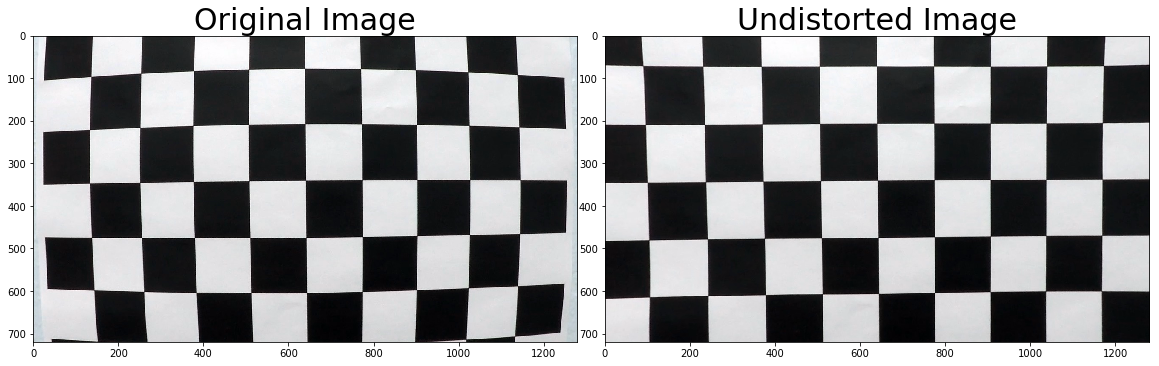

In [6]:
# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "camera_cal/calibration.p", "wb" ) )
#dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
f.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(exampleImg)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

Save_Image('output_images/',1,dst)

## Apply a distortion correction to raw images.

In [7]:
# undistort image using camera calibration matrix from above
def undistort(img):
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)


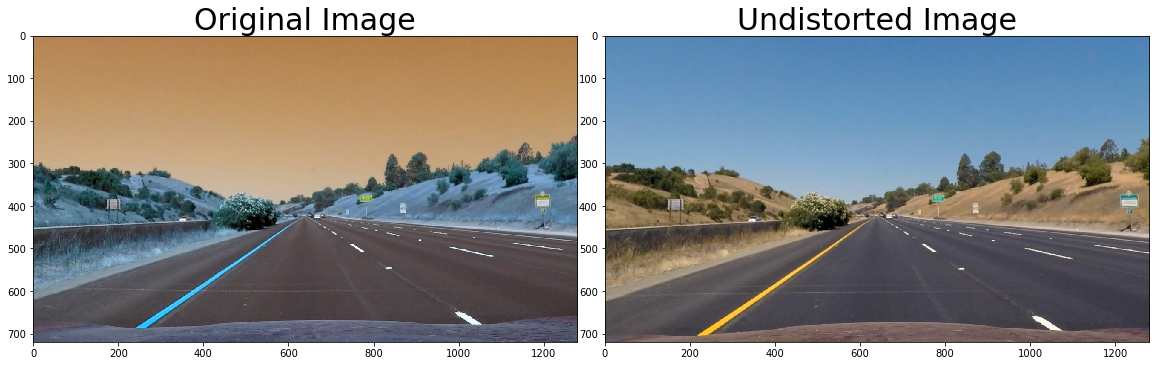

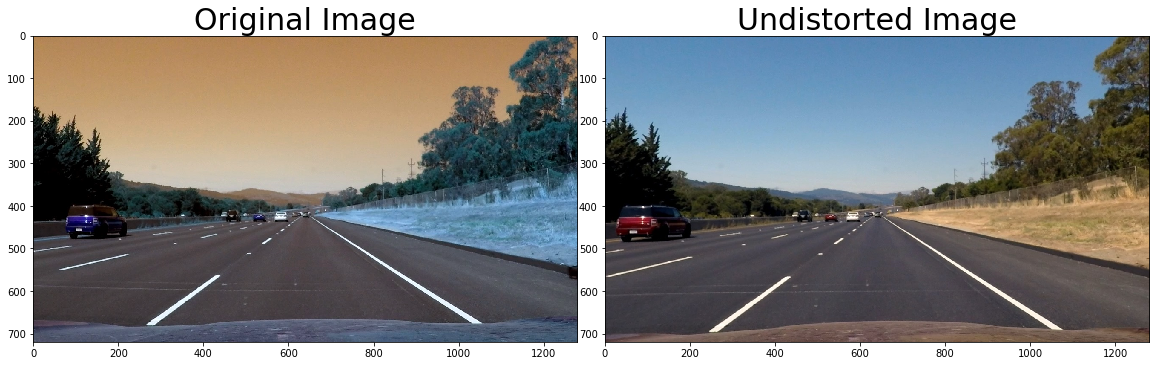

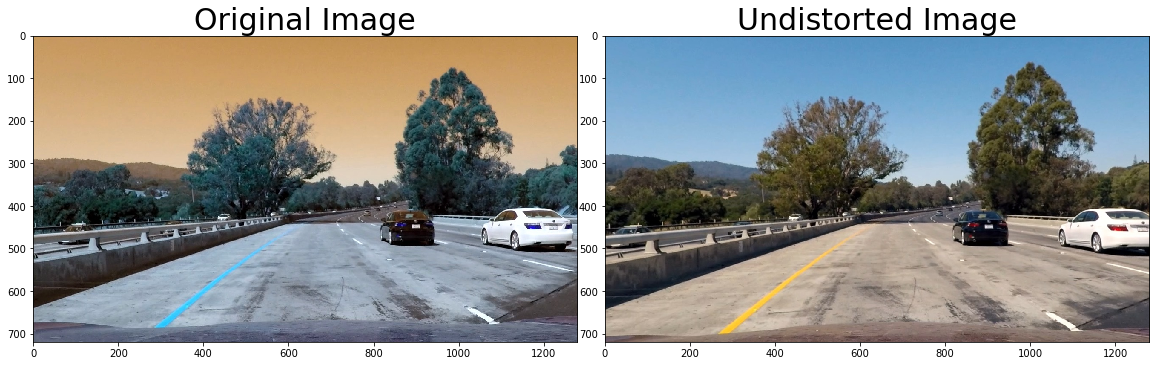

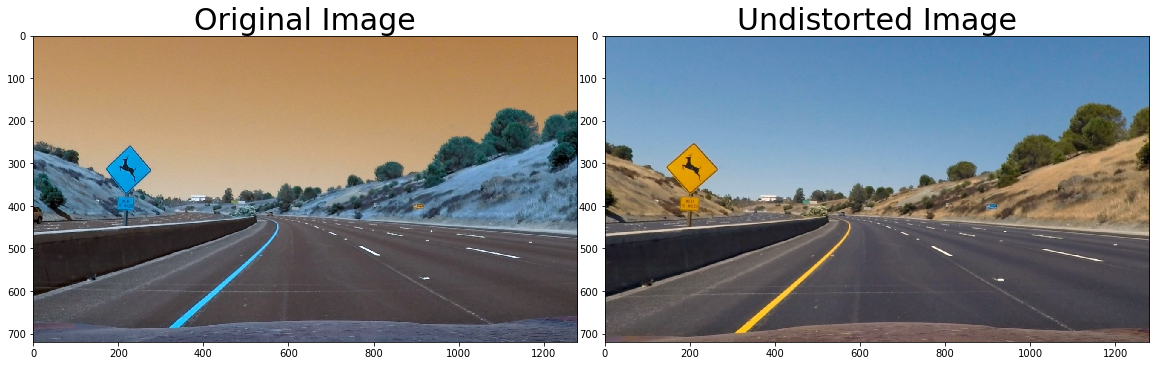

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


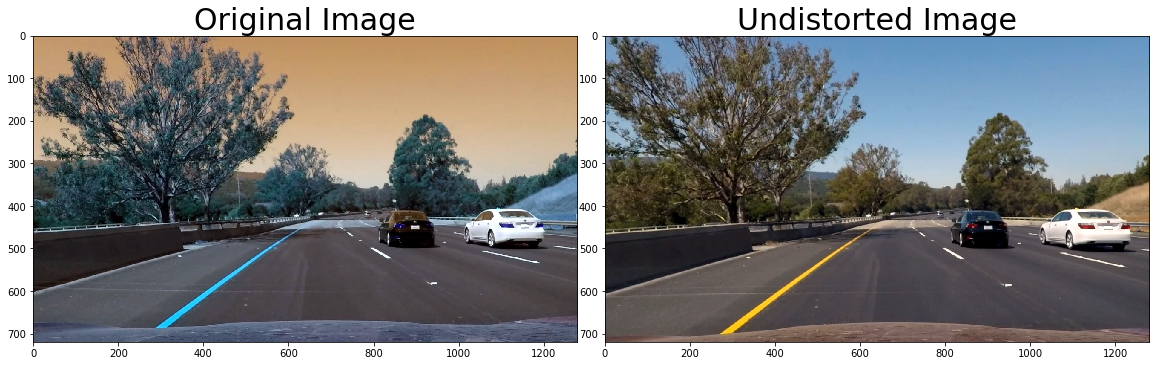

In [12]:
# Choose an image from which to build and demonstrate each step of the pipeline
Raw_Images = Load_Images('test_images/')
Raw_Sets = len(Raw_Images)

for Pics in range(0,Raw_Sets):
    # Printing out some stats and plotting
    print('This image is:', type(Raw_Images[Pics]), 'with dimesions:', Raw_Images[Pics].shape) 
    
    # Convert to grayscale
    Gray = cv2.cvtColor(Raw_Images[Pics], cv2.COLOR_BGR2RGB)
    exampleImg_undistort = undistort(Gray)
    
    # Visualize undistortion
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    f.subplots_adjust(hspace = .2, wspace=.05)
    ax1.imshow(Raw_Images[Pics],cmap='gray')
    ax1.set_title('Original Image', fontsize=30)
    ax2.imshow(exampleImg_undistort)
    ax2.set_title('Undistorted Image', fontsize=30)
    
    Save_Image('output_images/',Pics+2,exampleImg_undistort)

## Apply a perspective transform to rectify binary image ("birds-eye view").

In [13]:
def corners_unwarp(undist, src, dst):

    # Grab the image shape
    img_size = (undist.shape[1], undist.shape[0])

    # Given src and dst points, calculate the perspective transform matrix
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
    # Warp the image using OpenCV warpPerspective()
    warped = cv2.warpPerspective(undist, M, img_size, flags=cv2.INTER_LINEAR)

    # Return the resulting image and matrix
    return (warped, M, Minv)

img.shape[0] =  720  img.shape[1] = 1280
This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)


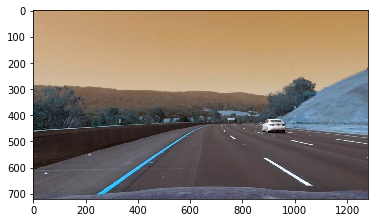

In [24]:
img = cv2.imread('output_images/image6.png')
img_size = (img.shape[1], img.shape[0])
print('img.shape[0] = ',img.shape[0],' img.shape[1] =',img.shape[1])
print('This image is:', type(img), 'with dimesions:', img.shape) 

plt.imshow(img)
plt.show()

# define source and destination points for transform
src = np.float32([(575,448),
                  (730,448), 
                  (200,682), 
                  (1100,682)])

dst = np.float32([(450,0),
                  (img.shape[1]-450,0),
                  (450,img.shape[0]),
                  (img.shape[1]-450,img.shape[0])])

top_down, M, Minv = corners_unwarp(img, src, dst)

True

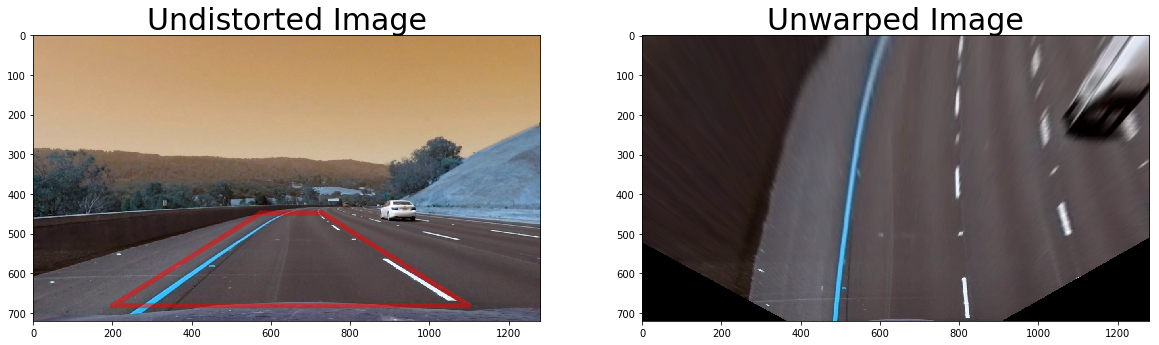

In [25]:
# Visualize unwarp
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)

x = [src[0][0],src[2][0],src[3][0],src[1][0],src[0][0]]
y = [src[0][1],src[2][1],src[3][1],src[1][1],src[0][1]]

ax1.plot(x, y, color='red', alpha=0.5, linewidth=5, solid_capstyle='round', zorder=2)

ax1.set_ylim([img.shape[0],0])
ax1.set_xlim([0,img.shape[1]])
ax1.set_title('Undistorted Image', fontsize=30)

ax2.imshow(top_down)
ax2.set_title('Unwarped Image', fontsize=30)
Save_Image('output_images/',10,top_down)

## Use color transforms, gradients to create a thresholded binary image.

HLS and Color Thresholds

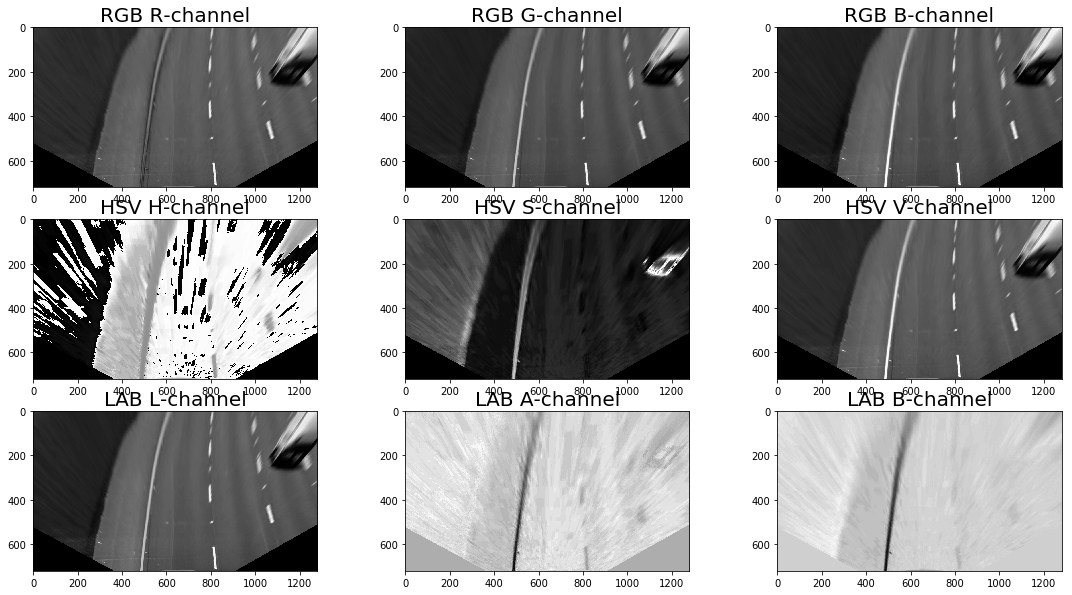

In [26]:
image = top_down
#mpimg.imread('test_images/test6.jpg')

thresh = (150, 255)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

binary = np.zeros_like(gray)
binary[(gray > thresh[0]) & (gray <= thresh[1])] = 1

R = image[:,:,0]
G = image[:,:,1]
B = image[:,:,2]

fig, axs = plt.subplots(3,3, figsize=(20, 10))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
#axs[0].imshow(binary, cmap ='gray')
#axs[0].set_title('Binary-channel', fontsize=20)
axs[0].imshow(R, cmap ='gray')
axs[0].set_title('RGB R-channel', fontsize=20)
axs[1].imshow(G, cmap ='gray')
axs[1].set_title('RGB G-channel', fontsize=20)
axs[2].imshow(B, cmap ='gray')
axs[2].set_title('RGB B-channel', fontsize=20)

exampleImg_unwarp_HSV = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
H = exampleImg_unwarp_HSV[:,:,0]
S = exampleImg_unwarp_HSV[:,:,1]
V = exampleImg_unwarp_HSV[:,:,2]
axs[3].imshow(H, cmap ='gray')
axs[3].set_title('HSV H-channel', fontsize=20)
axs[4].imshow(S, cmap ='gray')
axs[4].set_title('HSV S-channel', fontsize=20)
axs[5].imshow(V, cmap ='gray')
axs[5].set_title('HSV V-channel', fontsize=20)


exampleImg_unwarp_LAB = cv2.cvtColor(image, cv2.COLOR_RGB2Lab)
L = exampleImg_unwarp_LAB[:,:,0]
A = exampleImg_unwarp_LAB[:,:,1]
B = exampleImg_unwarp_LAB[:,:,2]
axs[6].imshow(L, cmap ='gray')
axs[6].set_title('LAB L-channel', fontsize=20)
axs[7].imshow(A, cmap ='gray')
axs[7].set_title('LAB A-channel', fontsize=20)
axs[8].imshow(B, cmap ='gray')
axs[8].set_title('LAB B-channel', fontsize=20)


save_results_to = 'output_images/'
fig.savefig(save_results_to + 'plot.png', dpi = 300)

In [27]:
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)): 

    # Convert to grayscale
    Gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    
    # Apply x or y gradient with the OpenCV Sobel() function and take the absolute value
    if(orient == 'x'):
        abs_sobel = np.absolute(cv2.Sobel(Gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel))
    if(orient == 'y'):   
        abs_sobel = np.absolute(cv2.Sobel(Gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel))
        
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    
    # Create a copy and apply the threshold
    Grad_binary = np.zeros_like(scaled_sobel)
    
    #Apply lower and upper thresholds
    Grad_binary[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
   
    # Create binary_output
    return (Grad_binary)

def mag_thresh(image, sobel_kernel=3, mag_thresh=(0, 255)):  # Calculate gradient magnitude

    # 1) Convert to grayscale
    GrayImg = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # 2) Take the gradient in x and y separately
    Sobelx = cv2.Sobel(GrayImg, cv2.CV_64F, 1 , 0, ksize=sobel_kernel)
    Sobely = cv2.Sobel(GrayImg, cv2.CV_64F, 0 , 1, ksize=sobel_kernel)
    
    # 3) Calculate the magnitude 
    MagSobel = np.sqrt((Sobelx**2) + (Sobely**2))
    
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    Scale_Factor = np.max(MagSobel)/255 
    Gradmag = (MagSobel/Scale_Factor).astype(np.uint8) 
    
    # 5) Create a binary mask where mag thresholds are met
    Mag_binary = np.zeros_like(Gradmag)
    
    # Apply threshold
    Mag_binary [( Gradmag >= mag_thresh[0]) & (Gradmag <= mag_thresh[1])] = 1

    return (Mag_binary)


def dir_threshold(image, sobel_kernel=3, thresh=(0, np.pi/2)): # Calculate gradient direction
    
    # Convert to grayscale
    Gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Take the gradient in x and y separately and Calculate the x and y gradients
    sobelx = cv2.Sobel(Gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(Gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    # Take the absolute value of the gradient direction, 
    # Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    
    #Create a binary mask where direction thresholds are met
    dir_binary =  np.zeros_like(absgraddir)
    
    dir_binary[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1

    return (dir_binary)

Test Functions

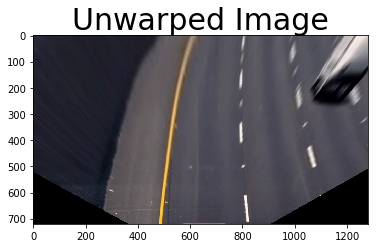

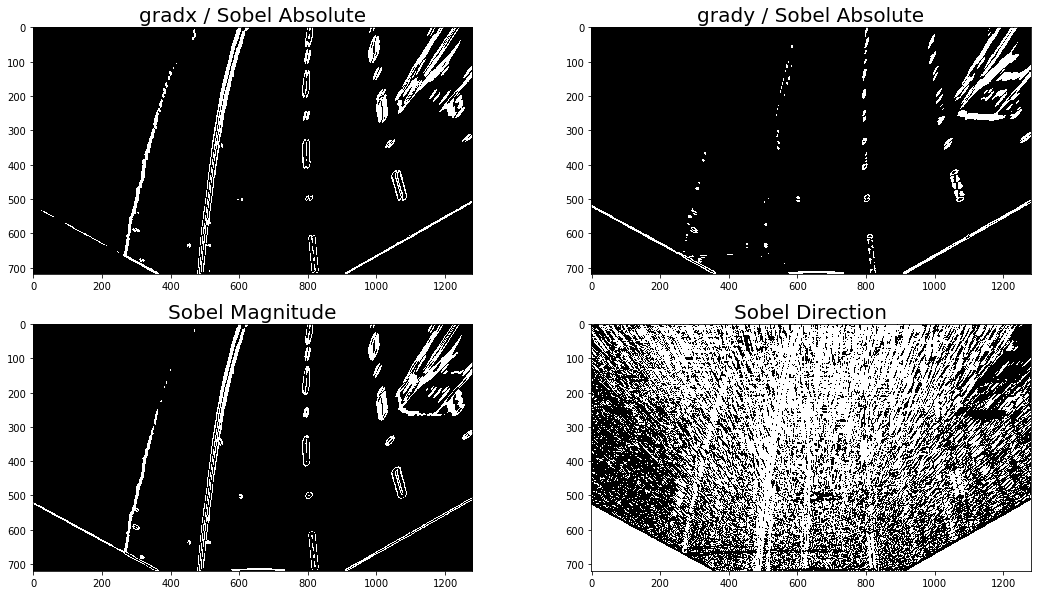

In [28]:
image = top_down
#cv2.imread('output_images/image7.png')
Gray = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(Gray)
plt.title('Unwarped Image', fontsize=30)
plt.show()

# Choose a Sobel kernel size
ksize = 25 # Choose a larger odd number to smooth gradient measurements

# Apply each of the thresholding functions
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(25, 100))
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(20, 100))
mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(30, 100))
dir_binary = dir_threshold(image, sobel_kernel=7, thresh=(0, 0.6))  #thresh=(0.7, 1.3)

combined = np.zeros_like(dir_binary)
combined[((mag_binary == 1) & (dir_binary == 1))] = 1
#combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1

fig, axs = plt.subplots(2,2, figsize=(20, 10))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
axs[0].imshow(gradx, cmap ='gray')
axs[0].set_title('gradx / Sobel Absolute', fontsize=20)
axs[1].imshow(grady, cmap ='gray')
axs[1].set_title('grady / Sobel Absolute', fontsize=20)
axs[2].imshow(mag_binary, cmap ='gray')
axs[2].set_title('Sobel Magnitude', fontsize=20)
axs[3].imshow(dir_binary, cmap ='gray')
axs[3].set_title('Sobel Direction', fontsize=20)
    
    
save_results_to = 'output_images/'
fig.savefig(save_results_to + 'Sobel.png', dpi = 300)

### Sobel Magnitude + Direction Threshold

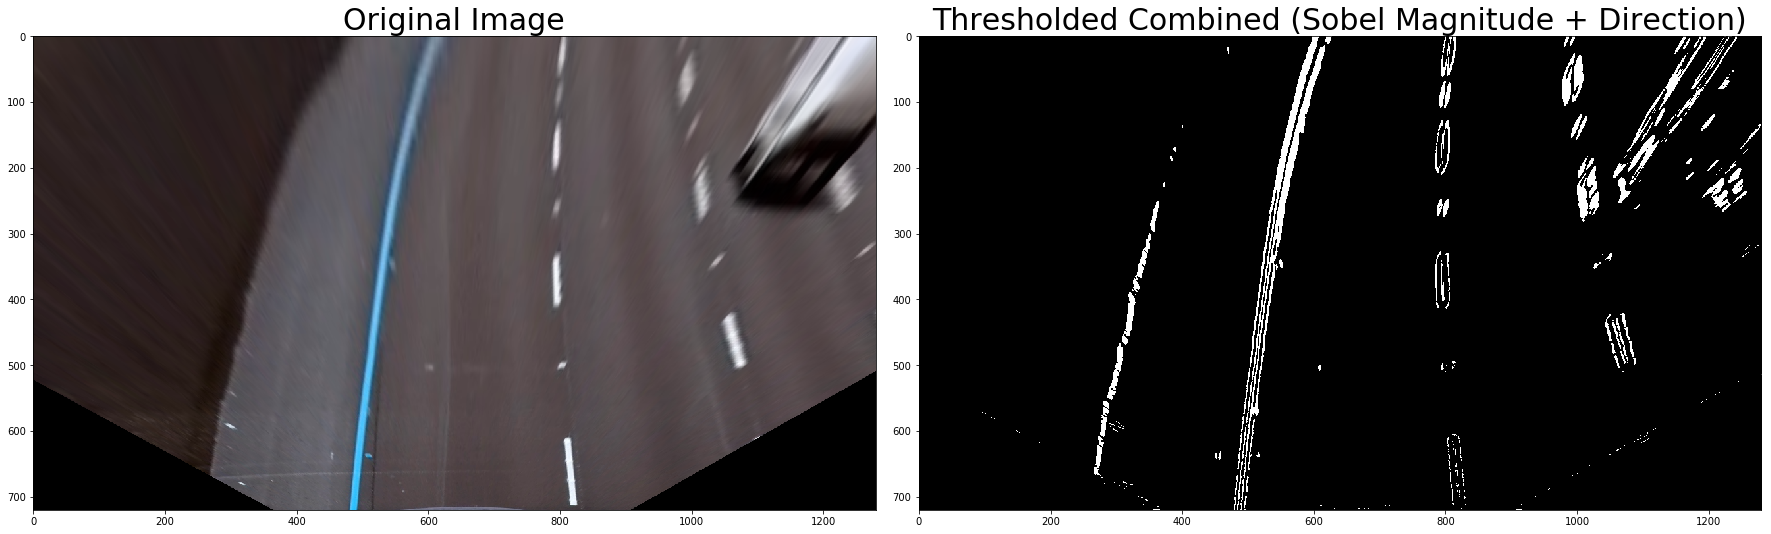

In [29]:
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(combined, cmap='gray')
ax2.set_title('Thresholded Combined (Sobel Magnitude + Direction)', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

save_results_to = 'output_images/'
f.savefig(save_results_to + 'Sobel_Magnitude_Direction_Threshold.png', dpi = 300)

In [30]:
def HLS_Select(img, thresh=(0, 255), channel='S'):

    # 1) Convert to HLS color space
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS) 
    
    # 2) Apply a threshold to the channels
    H_channel = hls[:,:,0]
    L_channel = hls[:,:,1]
    S_channel = hls[:,:,2]
    
    # 3) Return a binary image of threshold result
    if(channel == 'S'):
        S_channel = S_channel*(255/np.max(S_channel))
        binary_output = np.zeros_like(S_channel)
        binary_output[(S_channel > thresh[0]) & (S_channel <= thresh[1])] = 1
    elif(channel == 'H'):
        H_channel = H_channel*(255/np.max(H_channel))
        binary_output = np.zeros_like(H_channel)
        binary_output[(H_channel > thresh[0]) & (H_channel <= thresh[1])] = 1
    elif(channel == 'L'):
        L_channel = L_channel*(255/np.max(L_channel))
        binary_output = np.zeros_like(L_channel)
        binary_output[(L_channel > thresh[0]) & (L_channel <= thresh[1])] = 1
    else:
        print('Channel Type Not Defined')
        
    return (binary_output)


#LAB Colorspace

def LAB_Select(img, thresh=(0, 255), channel='L'):
    #def lab_bthresh(img, thresh=(190,255)):
    # 1) Convert to LAB color space
    lab = cv2.cvtColor(img, cv2.COLOR_RGB2Lab)
    
    # 2) Apply a threshold to the channels
    lab_L = lab[:,:,0]
    lab_A = lab[:,:,1]
    lab_B = lab[:,:,2]
    
    # 3) Return a binary image of threshold result
    if(channel == 'L'):
        if(np.max(lab_L) > 175):  # don't normalize if there are no yellows in the image
            lab_L = lab_L*(255/np.max(lab_L))
        binary_output = np.zeros_like(lab_L)
        binary_output[(lab_L > thresh[0]) & (lab_L <= thresh[1])] = 1
    elif(channel == 'A'):
        if(np.max(lab_A) > 175): 
            lab_A = lab_A*(255/np.max(lab_A))
        binary_output = np.zeros_like(lab_A)
        binary_output[(lab_A > thresh[0]) & (lab_A <= thresh[1])] = 1
    elif(channel == 'B'):
        if(np.max(lab_B) > 175): 
            lab_B = lab_B*(255/np.max(lab_B))
        binary_output = np.zeros_like(lab_B)
        binary_output[(lab_B > thresh[0]) & (lab_B <= thresh[1])] = 1
    else:
        print('Channel Type Not Defined')
        
    return binary_output    


Test Funtion

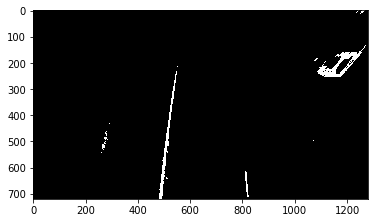

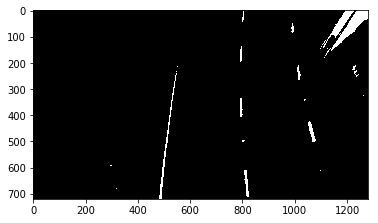

In [31]:
hls_binary = HLS_Select(image, thresh=(125, 255), channel='S')

plt.imshow(hls_binary,cmap = 'gray')
plt.show()

lab_binary = LAB_Select(image, thresh=(180, 255), channel='L')
plt.imshow(lab_binary,cmap = 'gray')
plt.show()

## Define Image Processing Pipeline

In [32]:
# Define the complete image processing pipeline, reads raw image and returns binary image with lane lines identified

def pipeline(img):
    # Undistort
    img_undistort = undistort(img)
    
    # Perspective Transform
    img_unwarp, M, Minv = corners_unwarp(img_undistort, src, dst)

    # Sobel Absolute
    #img_sobelAbs = abs_sobel_thresh(img_unwarp, orient='x', sobel_kernel=ksize, thresh=(25, 100))
    #img_sobelAbs = abs_sobel_thresh(img_unwarp, orient='y', sobel_kernel=ksize, thresh=(20, 100))
    
    # Sobel Magnitude
    #img_sobelMag = mag_thresh(img_unwarp, sobel_kernel=ksize, mag_thresh=(30, 100))
        
    # Sobel Direction
    #img_sobelDir = dir_threshold(img_unwarp, sobel_kernel=7, thresh=(0, 0.6)) 
    
    # HLS S-channel Threshold
    #hls_SThresh = HLS_Select(img_unwarp, thresh=(100, 255), channel='S')

    # HLS L-channel Threshold
    hls_LThresh = HLS_Select(img_unwarp, thresh=(220, 255), channel='L')
    
    # Lab L-channel Threshold 
    #lab_LThresh = LAB_Select(img_unwarp, thresh=(220, 255), channel='L')
    
    # Lab B-channel Threshold 
    lab_BThresh = LAB_Select(img_unwarp, thresh=(190, 255), channel='B')
    
    # Combine HLS and Lab B channel thresholds
    combined = np.zeros_like(lab_BThresh)
    combined[(hls_LThresh == 1) | (lab_BThresh == 1)] = 1
    #combined[(hls_LThresh == 1)] = 1   #Test
    return combined, Minv

## Run Pipeline on All Test Images

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)


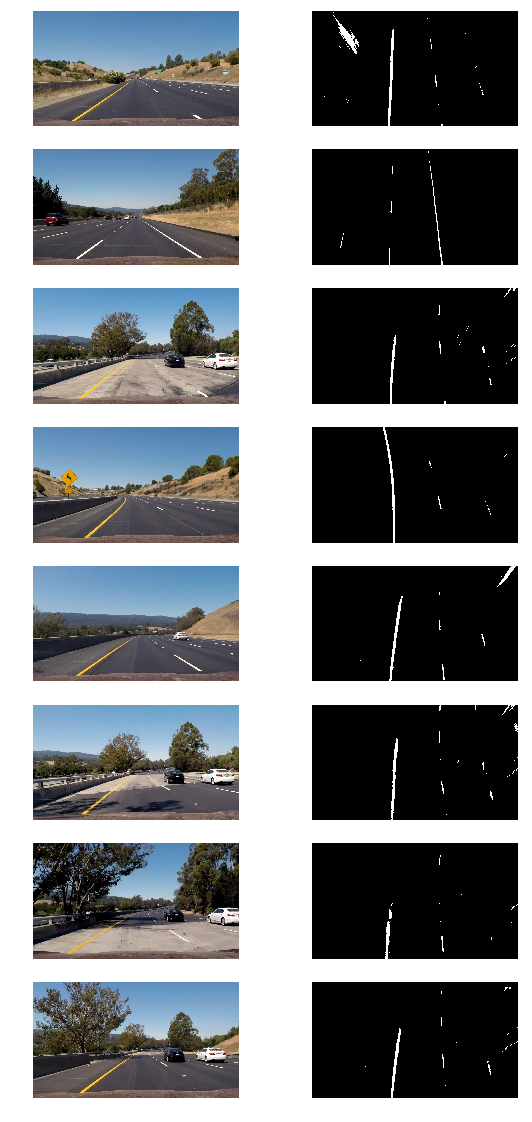

In [33]:
All_Test_Images = Load_Images('test_images/')
No_of_Images = len(All_Test_Images)

# Set up plot
fig, axs = plt.subplots(No_of_Images,2, figsize=(10, 20))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
 
i = 0    
for Pics in range(0,No_of_Images):    
    # Printing out some stats and plotting
    print('This image is:', type(All_Test_Images[Pics]), 'with dimesions:', All_Test_Images[Pics].shape) 

    Gray_Img = cv2.cvtColor(All_Test_Images[Pics], cv2.COLOR_BGR2RGB)  
    img_bin, Minv = pipeline(Gray_Img)    
    
    axs[i].imshow(Gray_Img)
    axs[i].axis('off')
    i += 1
    axs[i].imshow(img_bin, cmap='gray')
    axs[i].axis('off')
    i += 1
    
save_results_to = 'output_images/'
fig.savefig(save_results_to + 'Pipeline.png', dpi = 300)

### Sliding Window Polyfit

In [48]:
#The first step we'll take is to split the histogram into two sides, one for each lane line.
def find_lane_pixels(img):
    
    # Take a histogram of the bottom half of the image
    histogram = np.sum(img[img.shape[0]//2:,:], axis=0)
    # Find the peak of the left and right halves of the histogram,These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 10
    # Set the width of the windows +/- margin
    margin = 80
    # Set minimum number of pixels found to recenter window
    minpix = 40
    
    # Set height of windows
    window_height = np.int(img.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []
    
    # Rectangle data for visualization
    rectangle_data = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = img.shape[0] - (window+1)*window_height
        win_y_high = img.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        rectangle_data.append((win_y_low, win_y_high, win_xleft_low, win_xleft_high, win_xright_low, win_xright_high))
        
        # Identify the nonzero pixels in x and y within the window #
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

   # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    left_fit, right_fit = (None, None)
   
    # Fit a second order polynomial to each
    if len(leftx) != 0:
        left_fit = np.polyfit(lefty, leftx, 2)
    if len(rightx) != 0:
        right_fit = np.polyfit(righty, rightx, 2)
    
    visualization_data = (rectangle_data, histogram)
 
    return left_fit, right_fit, left_lane_inds, right_lane_inds, visualization_data


def fit_polynomial(binary_warped):
    
    left_fit, right_fit, left_lane_inds, right_lane_inds, visualization_data = find_lane_pixels(binary_warped)

    h = binary_warped.shape[0]
    left_fit_x_int = left_fit[0]*h**2 + left_fit[1]*h + left_fit[2]
    right_fit_x_int = right_fit[0]*h**2 + right_fit[1]*h + right_fit[2]

    rectangles = visualization_data[0]
    histogram = visualization_data[1]

    # Create an output image to draw on and  visualize the result
    out_img = np.uint8(np.dstack((binary_warped, binary_warped, binary_warped))*255)
    
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    for rect in rectangles:
    # Draw the windows on the visualization image
        cv2.rectangle(out_img,(rect[2],rect[0]),(rect[3],rect[1]),(0,255,0), 2) 
        cv2.rectangle(out_img,(rect[4],rect[0]),(rect[5],rect[1]),(0,255,0), 2) 
        
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [100, 200, 255]
    
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')
    plt.xlim(0, 1280)
    plt.ylim(720, 0)
    
    print(left_fit, right_fit)
    return (out_img,left_fit, right_fit,left_lane_inds, right_lane_inds)
    

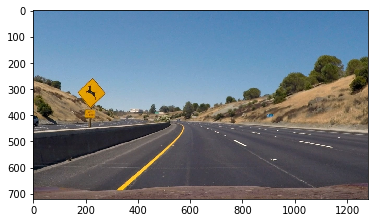

[-1.97892891e-04  2.22525994e-01  4.46691598e+02] [-5.14373328e-05  2.83236231e-01  6.71739392e+02]


True

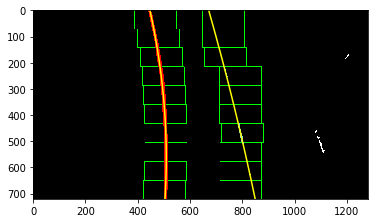

In [49]:
# Assuming you have created a warped binary image called "binary_warped" //  Load our image

exampleImg = cv2.imread('./test_images/test2.jpg')
exampleImg = cv2.cvtColor(exampleImg, cv2.COLOR_BGR2RGB)
plt.imshow(exampleImg)
plt.show()
exampleImg_bin, Minv = pipeline(exampleImg)   
out, LF, RF,LLI,RLI = fit_polynomial(exampleImg_bin)
plt.imshow(out)

Save_Image('output_images/',11,out)

(0, 1280)

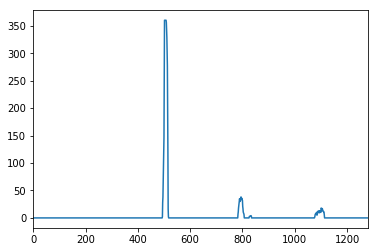

In [50]:
# Print histogram from sliding window polyfit for example image
L, R, Li, Ri, visualization_dataa = find_lane_pixels(exampleImg_bin)
histogram = visualization_dataa[1]
plt.plot(histogram)
plt.xlim(0, 1280)


In [52]:
# Load our image - this should be a new frame since last time!

def fit_poly(binary_warped,prev_left_fit, prev_right_fit):
    
    # HYPERPARAMETER
    margin = 80

    # Grab activated pixels
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    left_lane_inds = ((nonzerox > (prev_left_fit[0]*(nonzeroy**2) + prev_left_fit[1]*nonzeroy + 
                        prev_left_fit[2] - margin)) & (nonzerox < (prev_left_fit[0]*(nonzeroy**2) + 
                        prev_left_fit[1]*nonzeroy + prev_left_fit[2] + margin)))
    
    right_lane_inds = ((nonzerox > (prev_right_fit[0]*(nonzeroy**2) + prev_right_fit[1]*nonzeroy + 
                        prev_right_fit[2] - margin)) & (nonzerox < (prev_right_fit[0]*(nonzeroy**2) + 
                        prev_right_fit[1]*nonzeroy + prev_right_fit[2] + margin)))
    
    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    left_fit, right_fit = (None, None)
   
    # Fit a second order polynomial to each
    if len(leftx) != 0:
        left_fit_new = np.polyfit(lefty, leftx, 2)
    if len(rightx) != 0:
        right_fit_new = np.polyfit(righty, rightx, 2)
    
 
    return (left_fit_new, right_fit_new, left_lane_inds, right_lane_inds)


def search_around_poly(New_Image,left_fit, right_fit):

    left_fit2, right_fit2, left_lane_inds2, right_lane_inds2 = fit_poly(New_Image, left_fit, right_fit)

    margin = 80
    # Generate x and y values for plotting
    ploty = np.linspace(0, New_Image.shape[0]-1, New_Image.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    left_fitx2 = left_fit2[0]*ploty**2 + left_fit2[1]*ploty + left_fit2[2]
    right_fitx2 = right_fit2[0]*ploty**2 + right_fit2[1]*ploty + right_fit2[2]

    # Create an image to draw on and an image to show the selection window
    out_img = np.uint8(np.dstack((New_Image, New_Image, New_Image))*255)
    window_img = np.zeros_like(out_img)

    # Color in left and right line pixels
    nonzero = New_Image.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    out_img[nonzeroy[left_lane_inds2], nonzerox[left_lane_inds2]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds2], nonzerox[right_lane_inds2]] = [0, 0, 255]

    # Generate a polygon to illustrate the search window area (OLD FIT)
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
    result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
    plt.imshow(result)
    plt.plot(left_fitx2, ploty, color='yellow')
    plt.plot(right_fitx2, ploty, color='yellow')
    plt.xlim(0, 1280)
    plt.ylim(720, 0)
    
    Save_Image('output_images/',12,result)

    return (ploty,left_fit2, right_fit2)

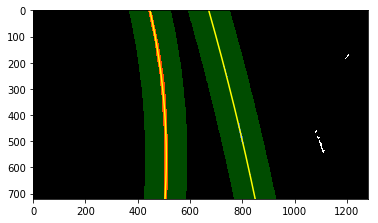

In [53]:
PlotY, LeftFit, RightFit = search_around_poly(exampleImg_bin,LF, RF)

## Determine the curvature of the lane and vehicle position with respect to center.

In [54]:
#Calculates the curvature of polynomial functions in meters.

def calc_curv_rad_and_center_dist(bin_img, l_fit, r_fit, l_lane_inds, r_lane_inds):
    
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 3.048/100 # meters per pixel in y dimension, lane line is 10 ft = 3.048 meters
    xm_per_pix = 3.7/378 # meters per pixel in x dimension, lane width is 12 ft = 3.7 meters
    left_curverad, right_curverad, center_dist = (0, 0, 0)
    # Define y-value where we want radius of curvature
    # I'll choose the maximum y-value, corresponding to the bottom of the image
    h = bin_img.shape[0]
    ploty = np.linspace(0, h-1, h)
    y_eval = np.max(ploty)
  
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = bin_img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Again, extract left and right line pixel positions
    leftx = nonzerox[l_lane_inds]
    lefty = nonzeroy[l_lane_inds] 
    rightx = nonzerox[r_lane_inds]
    righty = nonzeroy[r_lane_inds]
    
    if len(leftx) != 0 and len(rightx) != 0:
        # Fit new polynomials to x,y in world space
        left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
        right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
        # Calculate the new radii of curvature
        left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
        right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
        # Now our radius of curvature is in meters
    
    # Distance from center is image x midpoint - mean of l_fit and r_fit intercepts 
    if r_fit is not None and l_fit is not None:
        car_position = bin_img.shape[1]/2
        l_fit_x_int = l_fit[0]*h**2 + l_fit[1]*h + l_fit[2]
        r_fit_x_int = r_fit[0]*h**2 + r_fit[1]*h + r_fit[2]
        lane_center_position = (r_fit_x_int + l_fit_x_int) /2
        center_dist = (car_position - lane_center_position) * xm_per_pix
        
    return left_curverad, right_curverad, center_dist

In [55]:
rad_l, rad_r, d_center = calc_curv_rad_and_center_dist(exampleImg_bin, LF, RF, LLI, RLI)

print('Radius of curvature for example:', rad_l, 'm,', rad_r, 'm')
print('Distance from lane center for example:', d_center, 'm')

Radius of curvature for example: 239.94869018048612 m, 928.8533917738051 m
Distance from lane center for example: -0.35887555083899214 m


### Draw the Detected Lane Back onto the Original Image

In [56]:
def draw_lane(original_img, binary_img, l_fit, r_fit, Minv):
    
    new_img = np.copy(original_img)
    if l_fit is None or r_fit is None:
        return original_img
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(binary_img).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    
    h,w = binary_img.shape
    ploty = np.linspace(0, h-1, num=h)# to cover same y-range as image
    left_fitx = l_fit[0]*ploty**2 + l_fit[1]*ploty + l_fit[2]
    right_fitx = r_fit[0]*ploty**2 + r_fit[1]*ploty + r_fit[2]

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
    cv2.polylines(color_warp, np.int32([pts_left]), isClosed=False, color=(255,0,255), thickness=15)
    cv2.polylines(color_warp, np.int32([pts_right]), isClosed=False, color=(0,255,255), thickness=15)

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (w, h)) 
    # Combine the result with the original image
    result = cv2.addWeighted(new_img, 1, newwarp, 0.5, 0)
    return result

True

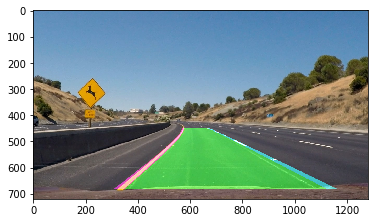

In [58]:
exampleImg_out1 = draw_lane(exampleImg, exampleImg_bin, LF, RF, Minv)
plt.imshow(exampleImg_out1)

Save_Image('output_images/',13,exampleImg_out1)

### Draw Curvature Radius and Distance from Center Data onto the Original Image

In [59]:
def draw_data(original_img, curv_rad, center_dist):
    new_img = np.copy(original_img)
    h = new_img.shape[0]
    font = cv2.FONT_HERSHEY_DUPLEX
    text = 'Curve radius: ' + '{:04.2f}'.format(curv_rad) + 'm'
    cv2.putText(new_img, text, (40,70), font, 1.5, (200,255,155), 2, cv2.LINE_AA)
    direction = ''
    if center_dist > 0:
        direction = 'right'
    elif center_dist < 0:
        direction = 'left'
    abs_center_dist = abs(center_dist)
    text = '{:04.3f}'.format(abs_center_dist) + 'm ' + direction + ' of center'
    cv2.putText(new_img, text, (40,120), font, 1.5, (200,255,155), 2, cv2.LINE_AA)
    return new_img

True

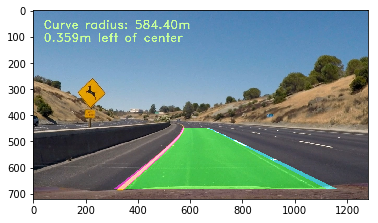

In [60]:
exampleImg_out2 = draw_data(exampleImg_out1, (rad_l+rad_r)/2, d_center)
plt.imshow(exampleImg_out2)
Save_Image('output_images/',14,exampleImg_out2)

## Define a Line Class for Storing Data

In [61]:
# Define a class to receive the characteristics of each line detection
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = []  
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #number of detected pixels
        self.px_count = None
    def add_fit(self, fit, inds):
        # add a found fit to the line, up to n
        if fit is not None:
            if self.best_fit is not None:
                # if we have a best fit, see how this new fit compares
                self.diffs = abs(fit-self.best_fit)
            if (self.diffs[0] > 0.001 or \
               self.diffs[1] > 1.0 or \
               self.diffs[2] > 100.) and \
               len(self.current_fit) > 0:
                # bad fit! abort! abort! ... well, unless there are no fits in the current_fit queue, then we'll take it
                self.detected = False
            else:
                self.detected = True
                self.px_count = np.count_nonzero(inds)
                self.current_fit.append(fit)
                if len(self.current_fit) > 5:
                    # throw out old fits, keep newest n
                    self.current_fit = self.current_fit[len(self.current_fit)-5:]
                self.best_fit = np.average(self.current_fit, axis=0)
        # or remove one from the history, if not found
        else:
            self.detected = False
            if len(self.current_fit) > 0:
                # throw out oldest fit
                self.current_fit = self.current_fit[:len(self.current_fit)-1]
            if len(self.current_fit) > 0:
                # if there are still any fits in the queue, best_fit is their average
                self.best_fit = np.average(self.current_fit, axis=0)



In [62]:
def process_image(img):
    new_img = np.copy(img)
    img_bin, Minv = pipeline(new_img)
    
    # if both left and right lines were detected last frame, use polyfit_using_prev_fit, otherwise use sliding window
    if not l_line.detected or not r_line.detected:
        l_fit, r_fit, l_lane_inds, r_lane_inds, _ = find_lane_pixels(img_bin)
    else:
        l_fit, r_fit, l_lane_inds, r_lane_inds = fit_poly(img_bin, l_line.best_fit, r_line.best_fit)
        
    # invalidate both fits if the difference in their x-intercepts isn't around 350 px (+/- 100 px)
    if l_fit is not None and r_fit is not None:
        # calculate x-intercept (bottom of image, x=image_height) for fits
        h = img.shape[0]
        l_fit_x_int = l_fit[0]*h**2 + l_fit[1]*h + l_fit[2]
        r_fit_x_int = r_fit[0]*h**2 + r_fit[1]*h + r_fit[2]
        x_int_diff = abs(r_fit_x_int-l_fit_x_int)
        if abs(350 - x_int_diff) > 100:
            l_fit = None
            r_fit = None
            
    l_line.add_fit(l_fit, l_lane_inds)
    r_line.add_fit(r_fit, r_lane_inds)
    
    # draw the current best fit if it exists
    if l_line.best_fit is not None and r_line.best_fit is not None:
        img_out1 = draw_lane(new_img, img_bin, l_line.best_fit, r_line.best_fit, Minv)
        rad_l, rad_r, d_center = calc_curv_rad_and_center_dist(img_bin, l_line.best_fit, r_line.best_fit, 
                                                               l_lane_inds, r_lane_inds)
        img_out = draw_data(img_out1, (rad_l+rad_r)/2, d_center)
    else:
        img_out = new_img
    
    diagnostic_output = False
    if diagnostic_output:
        # put together multi-view output
        diag_img = np.zeros((720,1280,3), dtype=np.uint8)
        
        # original output (top left)
        diag_img[0:360,0:640,:] = cv2.resize(img_out,(640,360))
        
        # binary overhead view (top right)
        img_bin = np.dstack((img_bin*255, img_bin*255, img_bin*255))
        resized_img_bin = cv2.resize(img_bin,(640,360))
        diag_img[0:360,640:1280, :] = resized_img_bin
        
        # overhead with all fits added (bottom right)
        img_bin_fit = np.copy(img_bin)
        for i, fit in enumerate(l_line.current_fit):
            img_bin_fit = plot_fit_onto_img(img_bin_fit, fit, (20*i+100,0,20*i+100))
        for i, fit in enumerate(r_line.current_fit):
            img_bin_fit = plot_fit_onto_img(img_bin_fit, fit, (0,20*i+100,20*i+100))
        img_bin_fit = plot_fit_onto_img(img_bin_fit, l_line.best_fit, (255,255,0))
        img_bin_fit = plot_fit_onto_img(img_bin_fit, r_line.best_fit, (255,255,0))
        diag_img[360:720,640:1280,:] = cv2.resize(img_bin_fit,(640,360))
        
        # diagnostic data (bottom left)
        color_ok = (200,255,155)
        color_bad = (255,155,155)
        font = cv2.FONT_HERSHEY_DUPLEX
        if l_fit is not None:
            text = 'This fit L: ' + ' {:0.6f}'.format(l_fit[0]) + \
                                    ' {:0.6f}'.format(l_fit[1]) + \
                                    ' {:0.6f}'.format(l_fit[2])
        else:
            text = 'This fit L: None'
        cv2.putText(diag_img, text, (40,380), font, .5, color_ok, 1, cv2.LINE_AA)
        if r_fit is not None:
            text = 'This fit R: ' + ' {:0.6f}'.format(r_fit[0]) + \
                                    ' {:0.6f}'.format(r_fit[1]) + \
                                    ' {:0.6f}'.format(r_fit[2])
        else:
            text = 'This fit R: None'
        cv2.putText(diag_img, text, (40,400), font, .5, color_ok, 1, cv2.LINE_AA)
        text = 'Best fit L: ' + ' {:0.6f}'.format(l_line.best_fit[0]) + \
                                ' {:0.6f}'.format(l_line.best_fit[1]) + \
                                ' {:0.6f}'.format(l_line.best_fit[2])
        cv2.putText(diag_img, text, (40,440), font, .5, color_ok, 1, cv2.LINE_AA)
        text = 'Best fit R: ' + ' {:0.6f}'.format(r_line.best_fit[0]) + \
                                ' {:0.6f}'.format(r_line.best_fit[1]) + \
                                ' {:0.6f}'.format(r_line.best_fit[2])
        cv2.putText(diag_img, text, (40,460), font, .5, color_ok, 1, cv2.LINE_AA)
        text = 'Diffs L: ' + ' {:0.6f}'.format(l_line.diffs[0]) + \
                             ' {:0.6f}'.format(l_line.diffs[1]) + \
                             ' {:0.6f}'.format(l_line.diffs[2])
        if l_line.diffs[0] > 0.001 or \
           l_line.diffs[1] > 1.0 or \
           l_line.diffs[2] > 100.:
            diffs_color = color_bad
        else:
            diffs_color = color_ok
        cv2.putText(diag_img, text, (40,500), font, .5, diffs_color, 1, cv2.LINE_AA)
        text = 'Diffs R: ' + ' {:0.6f}'.format(r_line.diffs[0]) + \
                             ' {:0.6f}'.format(r_line.diffs[1]) + \
                             ' {:0.6f}'.format(r_line.diffs[2])
        if r_line.diffs[0] > 0.001 or \
           r_line.diffs[1] > 1.0 or \
           r_line.diffs[2] > 100.:
            diffs_color = color_bad
        else:
            diffs_color = color_ok
        cv2.putText(diag_img, text, (40,520), font, .5, diffs_color, 1, cv2.LINE_AA)
        text = 'Good fit count L:' + str(len(l_line.current_fit))
        cv2.putText(diag_img, text, (40,560), font, .5, color_ok, 1, cv2.LINE_AA)
        text = 'Good fit count R:' + str(len(r_line.current_fit))
        cv2.putText(diag_img, text, (40,580), font, .5, color_ok, 1, cv2.LINE_AA)
        
        img_out = diag_img
    return img_out

In [63]:
def plot_fit_onto_img(img, fit, plot_color):
    if fit is None:
        return img
    new_img = np.copy(img)
    h = new_img.shape[0]
    ploty = np.linspace(0, h-1, h)
    plotx = fit[0]*ploty**2 + fit[1]*ploty + fit[2]
    pts = np.array([np.transpose(np.vstack([plotx, ploty]))])
    cv2.polylines(new_img, np.int32([pts]), isClosed=False, color=plot_color, thickness=8)
    return new_img

In [64]:
from moviepy.editor import VideoFileClip # Import everything needed to edit/save/watch video clips

l_line = Line()
r_line = Line()
#my_clip.write_gif('test.gif', fps=12)
video_output1 = 'project_video_output.mp4'
video_input1 = VideoFileClip('project_video.mp4')#.subclip(22,26)
processed_video = video_input1.fl_image(process_image)
%time processed_video.write_videofile(video_output1, audio=False)

[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4


100%|█████████████████████████████████████████████████████████████████████████████▉| 1260/1261 [02:26<00:00,  8.62it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

Wall time: 2min 27s
